<b>Data Description:</b>
    The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan
campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted
the personal loan that was offered to them in the earlier campaign.

<b>Domain:</b>
    Banking

<b>Context:</b>
    This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as
depositors). A campaign that the bank ran last year for liability customers showed a
healthy conversion rate of over 9% success. This has encouraged the retail marketing
department to devise campaigns with better target marketing to increase the success
ratio with minimal budget.

<b>Learning Outcomes:</b>

   -  Exploratory Data Analysis
   -  Data Cleaning
   -  Data Visualization
   -  Preparing the data to train a model 
   -  Training and making predictions using a classification model
   -  Model evaluation
    
<b>Objective:</b>
    The classification goal is to predict the likelihood of a liability customer buying personal loans which means we have to build a model which will be used to predict which customer will most likely to accept the offer for personal loan, based on the specific relationship with the bank across various features given in the dataset. Here I will be using the Supervised Learning methods to predict which model is best for this problem amongst Logistic Regresssion, K-Nearest Neighbors(KNN) and Naive Bayes Algorigthm.


### Import the necessary libraries :

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from scipy import stats

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score # Performance measure – Accuracy

<b>Comment :</b> Here I have used numpy, pandas, matplotlib, seaborn, scipy for EDA and Data Visualization. Also used sklearn for data spliting, model building and for confusion matrix. 

## ::--------------------------- Exploratory Data Analysis ---------------------------- ::

#### Read the data as a data frame :- 

In [5]:
df  = pd.read_excel('Bank_Personal_Loan_Modelling-1.xlsx',sheet_name=1)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<b>Comment:</b> Here I have read the Personal Loan  dataset using read_csv() function of pandas. df is a dataframe. I have used head() funtion to display first 5 records of the dataset.

<b>Target Column rearrange:- </b> As our Target Column(Personal Loan) is in middle of dataframe so for more convinient I have drop the personal loan column from the original place and appended at last of dataframe.

In [7]:
personal_loan = df['Personal Loan']
df.drop(['Personal Loan'], axis=1, inplace = True)
df['Personal Loan'] = personal_loan
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


<b>Comment:</b> Now the traget column is appended at the end of the dataframe.

<b> Features(attributes) Understanding from the above dataframe :- </b> 

- The ID variable can be ignored as it will not any effect on our model. As we know customer Id is just to maitain the record in serial order. There is no relationship with Id and Loan.
- Target Variable is <b>Personal Loan</b> which describe whether the person has taken loan or not. This is the variable which we need to predict.

Nonimal Varibles :
- ID - Customer ID
- ZIP Code - Home Address ZIP code of the customer. This variable can also be ignored becasue we can not judge the customers based on thier area or location.

Ordinal Categorical variables :
- Family - Number of famlily member of the customer
- Education - Education level of the customer. In our dataset it ranges from 1 to 3 which are Under Graduate, Graduate and Post Graduate respectivly.

Interval Variables :
- Age        - Age of the customer
- Experience - Years of experience of customer has
- Income     - Annula Income of the customer which is in dollars
- CCAvg      - Avg. spending on credit cards per month which in dollars.
- Mortgage    - Value of House Mortgage

Binary Categorical Variable :
- CD Account - Does the customer have CD Account with bank or not?
- Security Account - Does the customer have Security Account with bank or not?
- Online  - Does the customer have Online banking facility with bank or not?
- Credit Card - Does the customer have a credit card issued by Universal Bank or not?
- Personal Loan - This our target variable which we have to predict. This indicates that the customer has token loan or not?





















### Shape of the data :- 

In [5]:
rows_count, columns_count = df.shape
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)

Total Number of rows : 5000
Total Number of columns : 14


<b>Comment:</b> Shape of the dataframe is (5000, 14).
There are 5000 rows and 14 columns in the dataset. 

###  Data type of each attribute :-

In [6]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Personal Loan           int64
dtype: object

<b>comment : </b> We can also display the data types of dataframe using df.info() function which gives even more useful info.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
Personal Loan         5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<b>Comment :</b> Here we can see that all the variables are numerical. But the columns 'CD Account', 'Online', 'Family', 'Education' , 'CreditCard' and 'Securities Account' are categorical variable which should be in 'category' type. 

### Checking the presence of missing values :-

In [8]:
df.isnull().sum() 

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64

<b>Comment:</b> Here total missing values count from each column is 0 and we can see there is no missing value in the dataframe.

In [9]:
df.isnull().values.any()

False

<b>Comment:</b> This gives if we have any missing values at all. False : No missing value, True: Missing value 

#### Missing value Visualization :- 

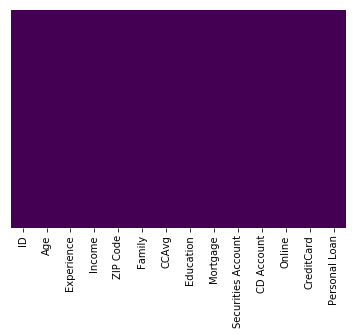

In [10]:
sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='viridis')

<b>Comment: </b> From the above heatmap graph we can see that there is no missing value in dataset.

### Checking the unique data :-

In [11]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
Personal Loan            2
dtype: int64

### Transposing index and columns:-

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


<b>Observation:</b> 
- <b>Important : </b>Here we can see that minumum value of Experience column is <b>-3.0</b> which could be a mistake because Experience can not be negative. So I will be fixing it in data cleaning and error fixing part.
- Binary varibales 'Personal Loan', 'Credit Card', 'Online', 'CD Account', 'Security Account' has clean data.
- Ordinary Cat variables 'Familty' and 'Education' are also clean.
- Target variable also looks fine. 

In [13]:
### Five point summary of  attributes and label :-

In [14]:
df_transpose = df.describe().T
df_transpose[['min', '25%', '50%', '75%', 'max']]

,min,25%,50%,75%,max
ID,1.0,1250.75,2500.5,3750.25,5000.0
Age,23.0,35.00,45.0,55.00,67.0
Experience,-3.0,10.00,20.0,30.00,43.0
Income,8.0,39.00,64.0,98.00,224.0
ZIP Code,9307.0,91911.00,93437.0,94608.00,96651.0
Family,1.0,1.00,2.0,3.00,4.0
CCAvg,0.0,0.70,1.5,2.50,10.0
Education,1.0,1.00,2.0,3.00,3.0
Mortgage,0.0,0.00,0.0,101.00,635.0
Securities Account,0.0,0.00,0.0,0.00,1.0


###  Pair plot that includes all the columns of the data frame :-

<b>Note: </b> I am not using ID column in tha pair plot as it is not relevent with our analysis. Id column is jut for record index.

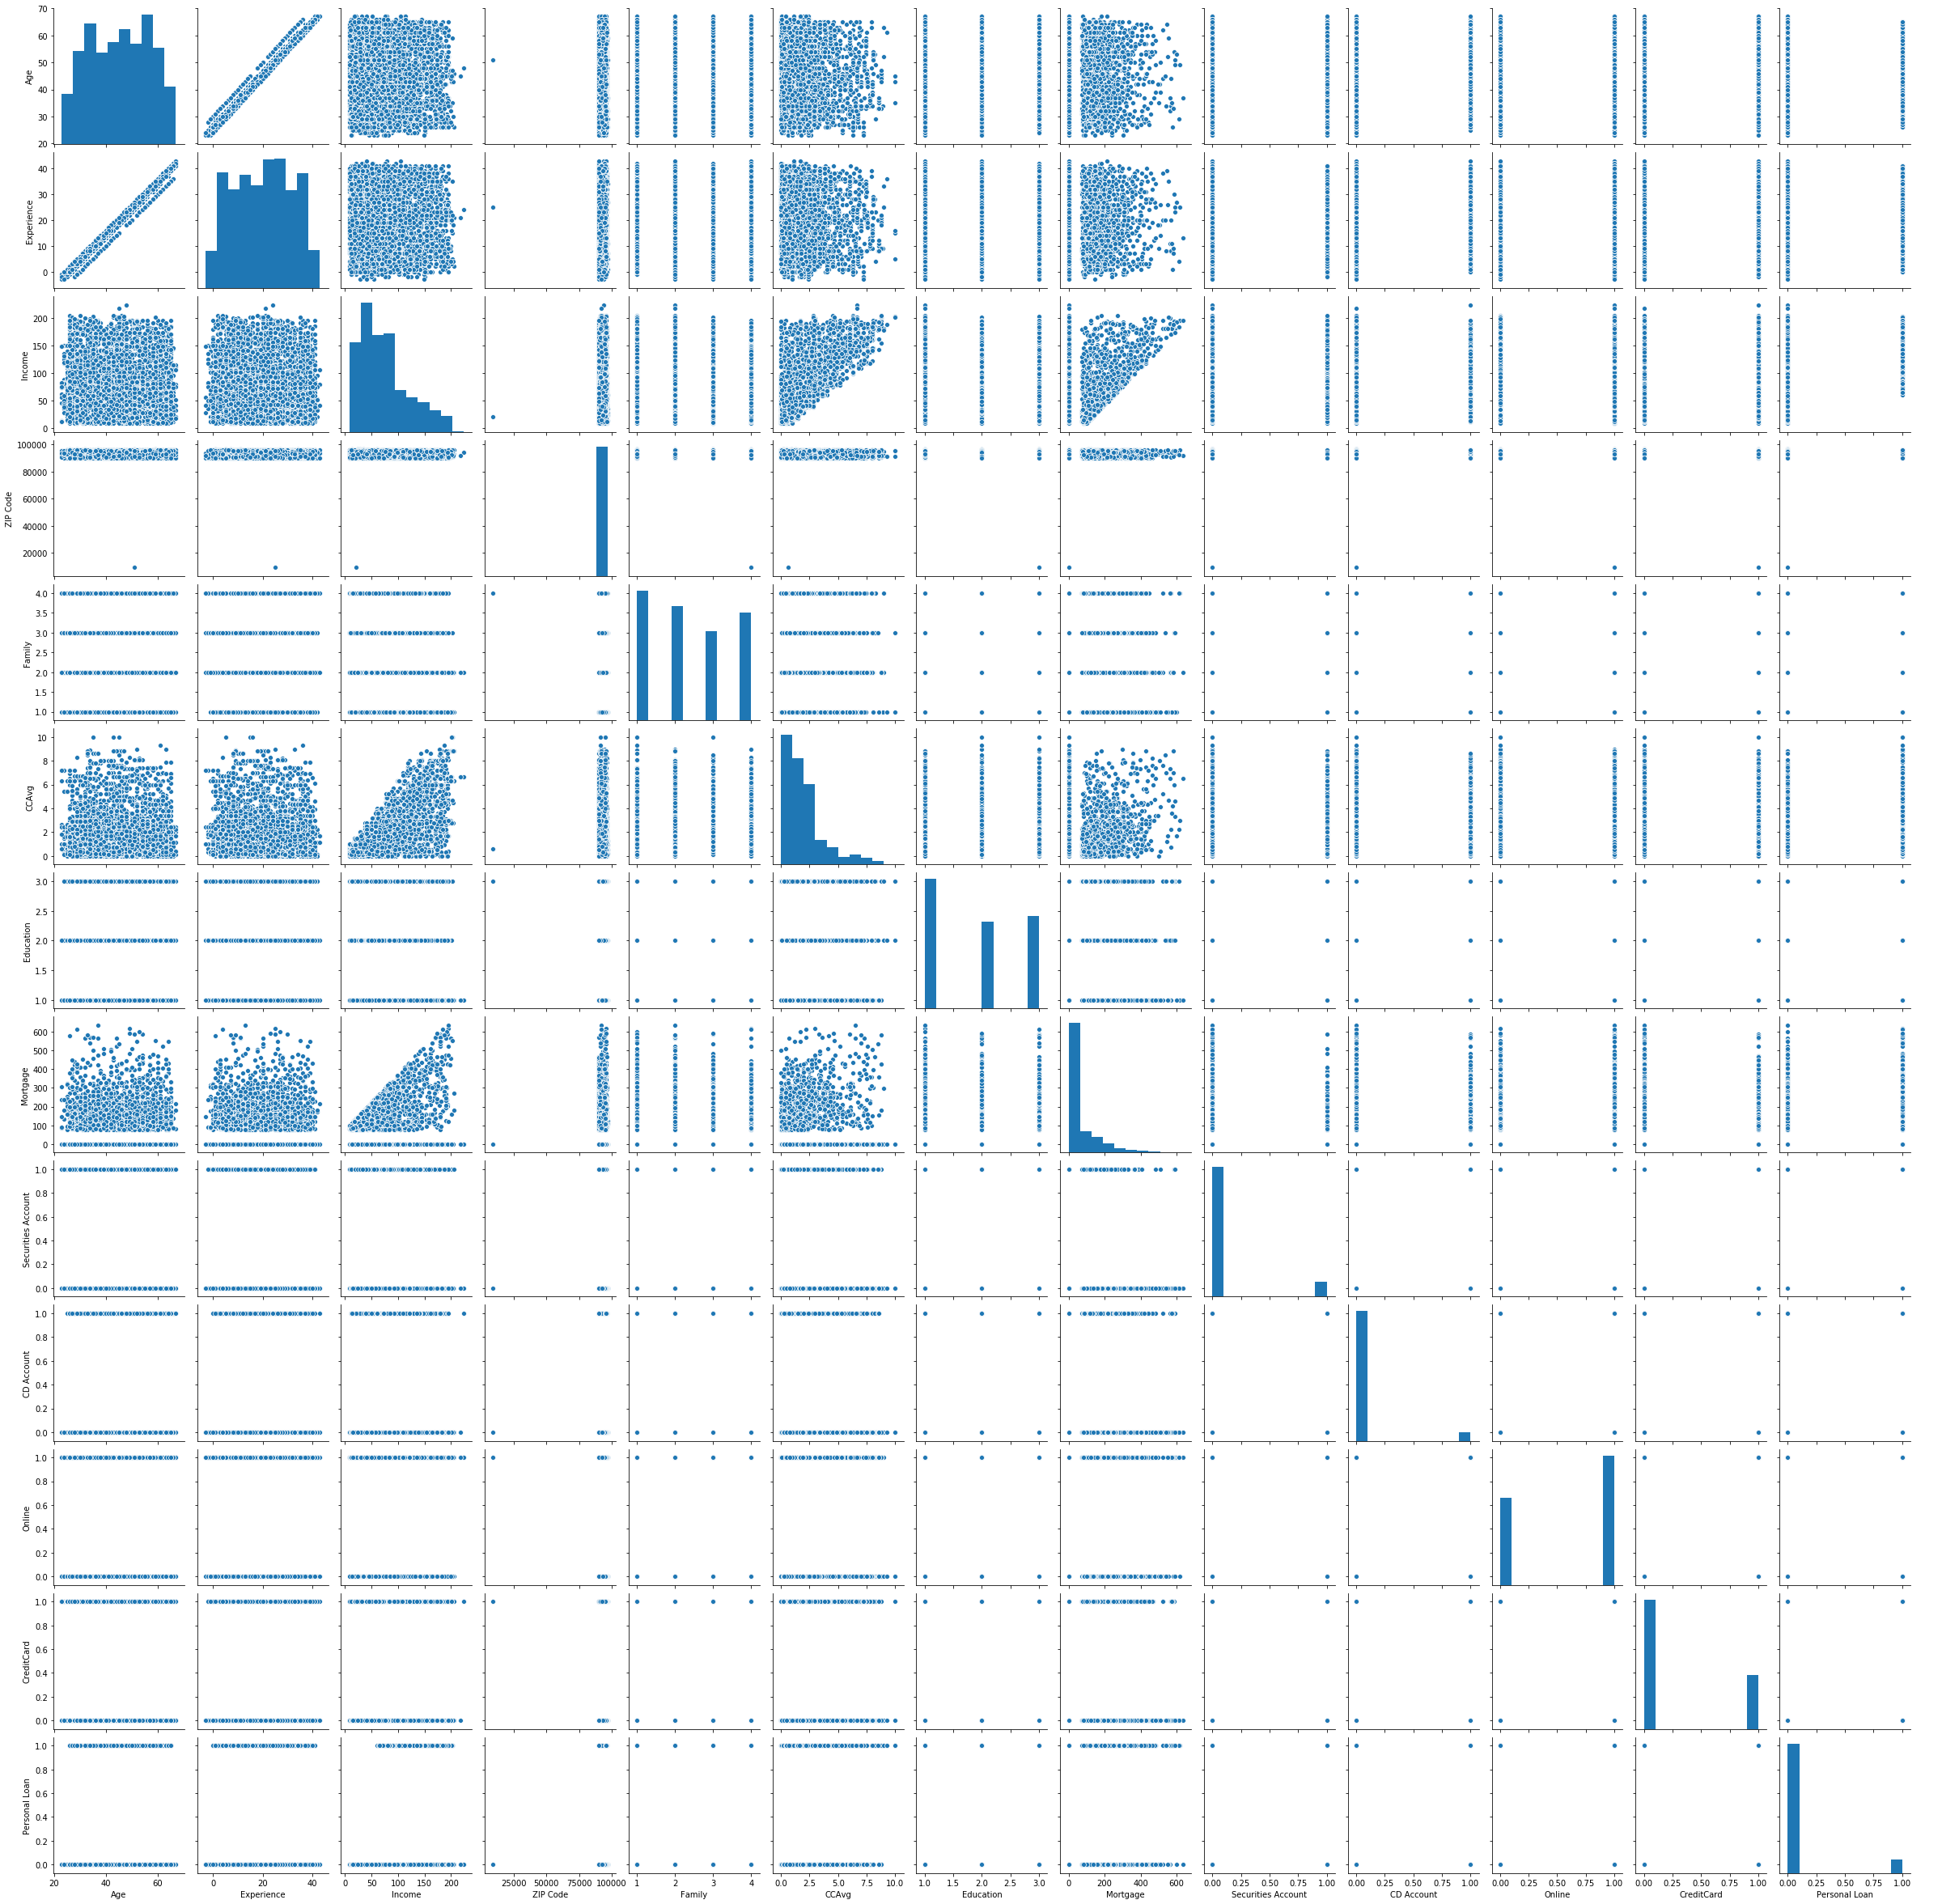

In [15]:
sns.pairplot(df.iloc[:,1:]) 

<b>Observation : </b> From the above pair plot we can infer the association among the attributes and target column as follows:
- 'Age' column is normally distributed. Here can see that the mean and midean is almost same which we have also seen in the transpose matrics. Most of the customers age is between 25 to 65 years.
- 'Experience' is also mormally distributed. Here also mean is amost equal to midean. 'Experience' and 'Age' are stong possitive associasion.
- 'Income' is positively skewed and it will also have the outlier
- We dont see any relationship with the ZIP Code and other variables.
- Family and Education has low association with the 'Personal Loan'. 
- The disribution of CCAvg is also a possotively skewed variable. Majority of the customers average monthly spending is between 1k to 9k.
- 'Mortgage' is also positively skewed. Majority of the individuals have a mortgage of less than 40K. 

 ### Error Fixing(Data Cleaning) :-

In [16]:
# Checking the negative values
df[df['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [17]:
# Total records of negative experience
df[df['Experience'] < 0]['Experience'].count()

52

<b>Comment:</b> There are 52 records with negative Experience are present in the dataset.



#### Checking the association of Experience with other quantitive variables :

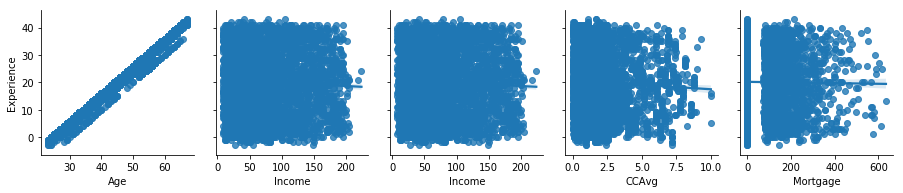

In [18]:
quantitiveVar = ['Age', 'Income', 'Income', 'CCAvg', 'Mortgage']
expGrid = sns.PairGrid(df, y_vars = 'Experience', x_vars = quantitiveVar)
expGrid.map(sns.regplot)

<b>Observation:</b> By looking above plots we can see that 'Age' has very strong and possitive association with 'Experience'. I am also considering 'Education' to fix the negative experience error. Becuase as we know experience relats to the education level. 

<b>Decission: </b> We can replace each negative 'Experience' value with the median of possitive 'Experience' associated with the particular 'Age' and 'Education' value.

<b>Steps to be followed in the following code: </b> 
- Get the record of experience whose value is greater than 0
- Get the record of experience whose value is lesser than 0
- Get the list of Cutomer ID whose experience value is negative
- Get the list of 'Age' values where it finds negative values in 'Experience' column
- Get the list of 'Education' values where it finds negaitve values in 'Experience' column
- Next it filters the records matching the above conditions from the dataframe which has data with possive experience and takes the median and store in exp. There could be chance that there will be no possive experience which matches the above condtion. In such case it matches the above condiiton from the dataframe which has the record with negative experience and gets the median and store in exp.
- Next it will replace the negative experience with the median.
- After execution of below code we will check the negative experience again.

In [19]:
df_Possitive_Experience = df[df['Experience'] > 0]
df_Negative_Experience =  df[df['Experience'] < 0]
df_Negative_Experience_List = df_Negative_Experience['ID'].tolist()

for id in df_Negative_Experience_List:
    age_values = df.loc[np.where(df['ID']==id)]["Age"].tolist()[0]
    education_values = df.loc[np.where(df['ID']==id)]["Education"].tolist()[0]
    possitive_Experience_Filtered = df_Possitive_Experience[(df_Possitive_Experience['Age'] == age_values) & (df_Possitive_Experience['Education'] == education_values)]
    if possitive_Experience_Filtered.empty :
        negative_Experience_Filtered = df_Negative_Experience[(df_Negative_Experience['Age'] == age_values) & (df_Negative_Experience['Education'] == education_values)]
        exp = round(negative_Experience_Filtered['Experience'].median())
    else:
        exp = round(possitive_Experience_Filtered['Experience'].median())
    df.loc[df.loc[np.where(df['ID']==id)].index, 'Experience'] = abs(exp)

In [20]:
# Total records of negative experience
df[df['Experience'] < 0]['Experience'].count()

0

<b> Comment: </b> Now we can see that negative values count is 0 means there is no negative value anymore in the dataframe.
- Describing the 'Experience' column to check the count, mean, standard deviation and five point summary.

In [21]:
df.Experience.describe()

count    5000.000000
mean       20.134800
std        11.414863
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

<b>Comment: </b> Now we can see the min is 0.0 which was -3.0 before error fixing.   

## ::----------------------------------- Data Visualization --------------------------------::

###  Data distribution in each attribute :-

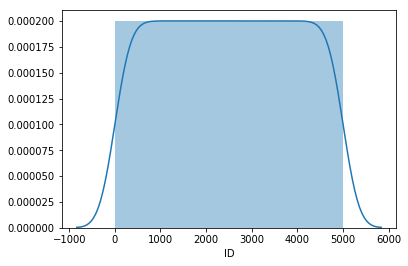

In [22]:
sns.distplot(df['ID'])

<b>Observation:</b> The above graph is unform distribution. 

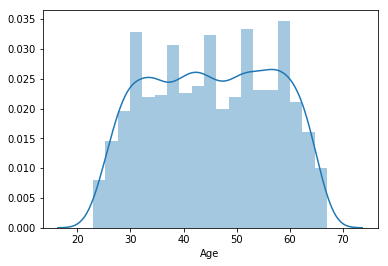

In [23]:
sns.distplot(df['Age'])

<b>Observation:</b> Age column is normaly distrubuted.

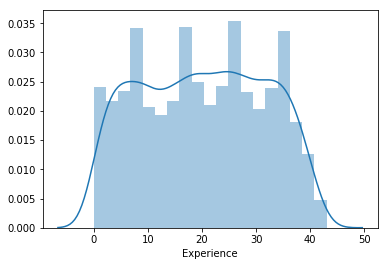

In [24]:
sns.distplot(df['Experience'])

<b>Observation:</b>  Experience is also normaly distributed.

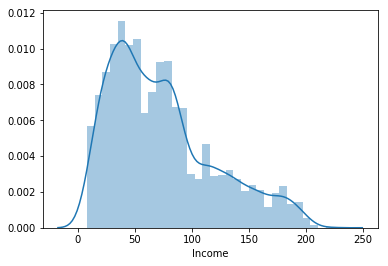

In [25]:
sns.distplot(df['Income'])

<b> Observation: </b>The above distributionis is right skewed distribution because the tail goes to the right.

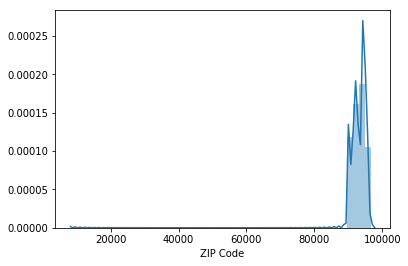

In [26]:
sns.distplot(df['ZIP Code'])

<b>Observation:</b> The is uniformaly distrubuted. Data points are more with family size 1 and 2.

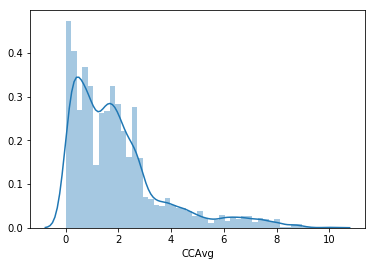

In [27]:
sns.distplot(df['CCAvg'])

<b> Comment: </b> The above distributionis is right skewed distribution because the tail goes to the right. Most of the customers monthly avg. spending on credit cards is between 1k to 2.5K. There are very few customers whose monthly avg. spending on credit card is more than 8k. 
    

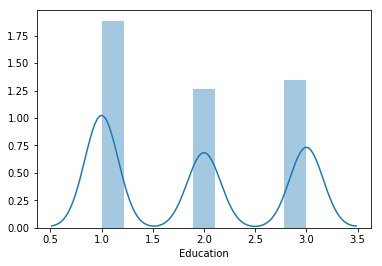

In [28]:
sns.distplot(df['Education'])

<b>Observation:</b> Undergrad level customers are more than the Graduate and Advanced/Professional customers.
 

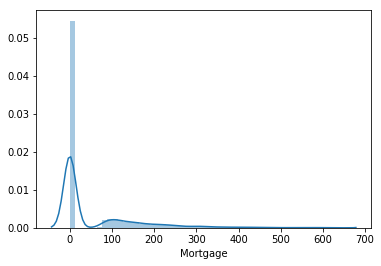

In [29]:
sns.distplot(df['Mortgage'])

<b>Observation:</b>The above distributionis is right skewed distribution because the tail goes to the right. 
Most of the customers do not have mortgage. There are more customers whose mortgage amount is between $80000 to $150000 . Very few customers whos mortgage amount is more than $600000.

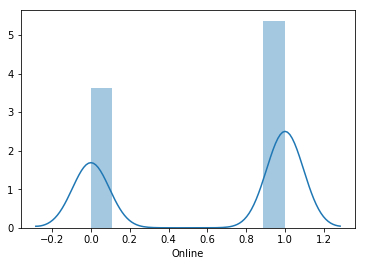

In [30]:
sns.distplot(df['Online'])

<b>Observation:</b> This is a Bernoulli Distrubution. Number of customers who have Online accout is geater than the number of customers who do not have online account

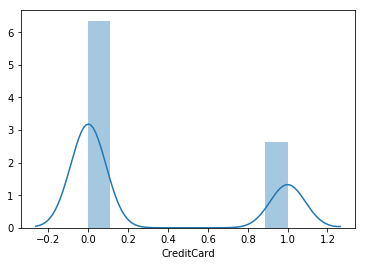

In [31]:
sns.distplot(df['CreditCard'])

<b>Observation:</b> It is a Bernoulli Distrubution. Number of customers without Credit Card is almost double than the number of customers with Credit Card.

###  Target column distribution and Data Visualization with Personal Loan Column :-

In [32]:
loan_counts = pd.DataFrame(df["Personal Loan"].value_counts()).reset_index()
loan_counts.columns =["Labels","Personal Loan"]
loan_counts

,Labels,Personal Loan
0,0,4520
1,1,480


<b>Comment:</b> Out of 5000 data points, 4520 are labeled as 0 and 480 as 1. Percentage of customers who took loan is significantlly greater than customers who did not take loan. I have also show the percentage using in pie chart below.


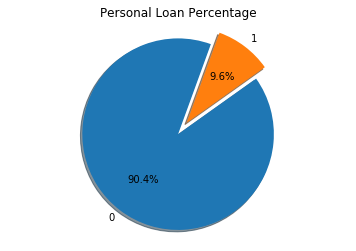

In [33]:
fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(loan_counts["Personal Loan"], explode=explode, labels=loan_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')  
plt.title("Personal Loan Percentage")
plt.show()

<b>Important :</b> From the above we can see that the data is having a huge bias(alomot 1:10) towards the category of people not accepting the personal loan. Hence we can build an opinion that our model will tends to perform better towards predicting which customers will not accept the personal loan. However, our goal is to identityfy the customer who can accept the personal loan based on the given features. 

#### Influence of important features on Personal Loan. From the above pair plot we can see some features which has relationship with the target column i.e personal loan :-

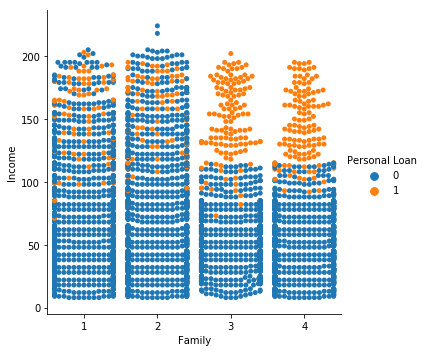

In [34]:
sns.catplot(x='Family', y='Income', hue='Personal Loan', data = df, kind='swarm')

<b>Observation:</b> Customers who have family size 3 or greater with higher income between 100k to 200k are more likely to take loan.

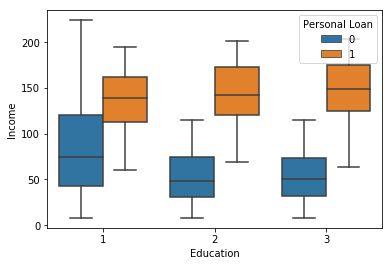

In [35]:
sns.boxplot(x='Education', y='Income', hue='Personal Loan', data = df)

<b>observation: </b> From above we can say that customers with undergraduate level of education and family greater than 3 are good customers who took loan. Customer who took loan have same income range irrespective of education level. Education of Graduate and above have more chance to take loan.

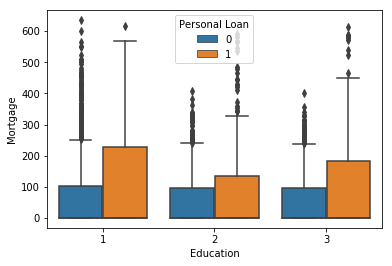

In [36]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=df)

<b>Observation :</b> From the above box plot we can see that customers whose education level is 1 and did not take loan has higher mortgage than customers who take loan of same education level. Customers whose education level is 2and 3 and did not take loan has lesser mortgage than customers who take loan of same education level. 

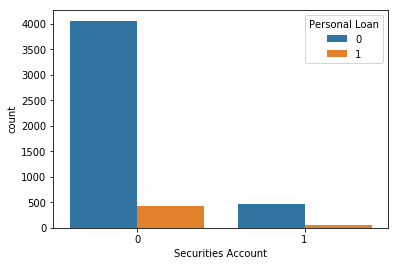

In [37]:
sns.countplot(x="Securities Account", data=df,hue="Personal Loan")

<b>Observation :</b> Customers who has securies account are more likly to take loan. Majority of customers who does not have loan do not have securities account. 

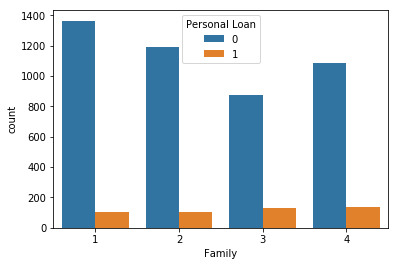

In [38]:
sns.countplot(x='Family',data=df,hue='Personal Loan')

<b>Observation :</b> Family size does not have any impact in personal loan. But it seems families with size of 3 and 4 are more likely to take loan.

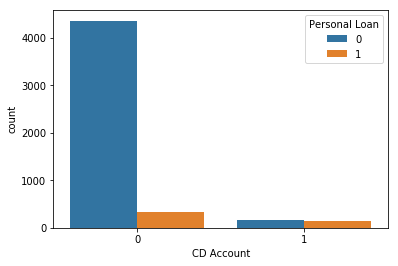

In [39]:
sns.countplot(x='CD Account',data=df,hue='Personal Loan')

<b>Observation: </b> Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

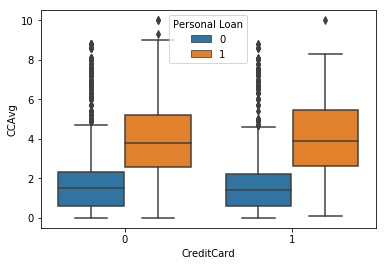

In [40]:
sns.boxplot(x="CreditCard", y='CCAvg', hue="Personal Loan", data=df)


<b>Observation: </b> Customers who have credit card and monthly spending is higher are more likly to take loan.

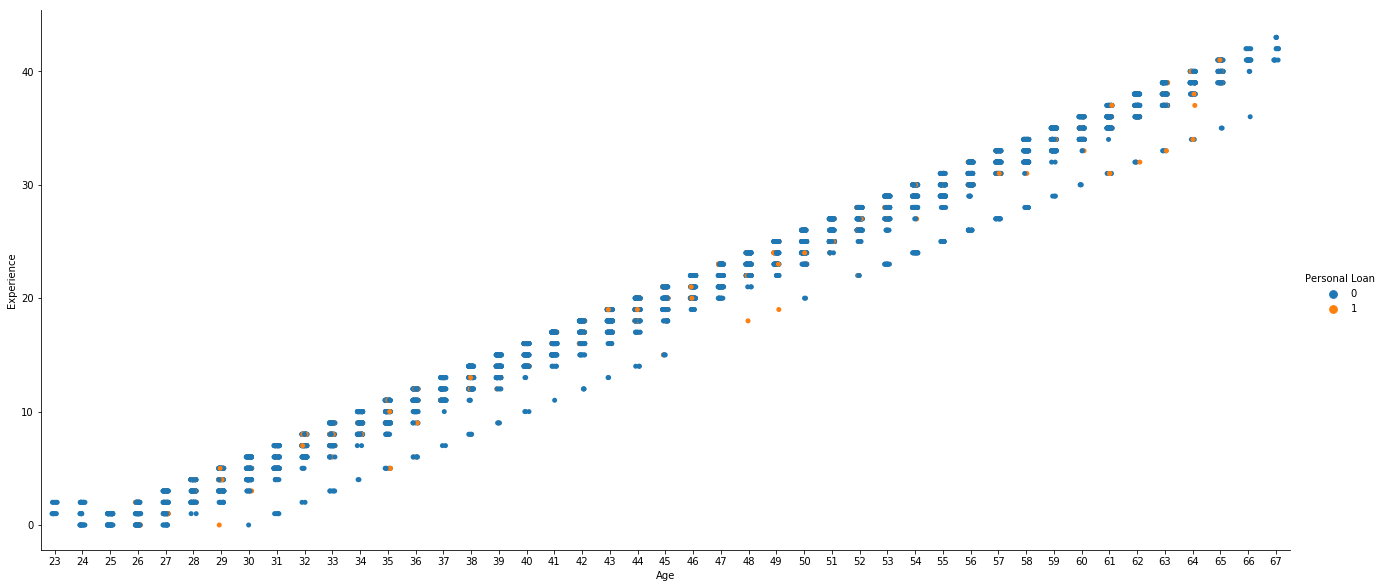

In [41]:
sns.catplot(x='Age', y='Experience', hue='Personal Loan', data = df, height=8.27, aspect=11/5)

<b>Observation: </b>From the above we clearly see that  Age and Experience have very storng association. As Age increases Experience also increases. We can try building our model by droping Experience column. 

Text(0.5, 1.0, 'CCAvg Distribution')

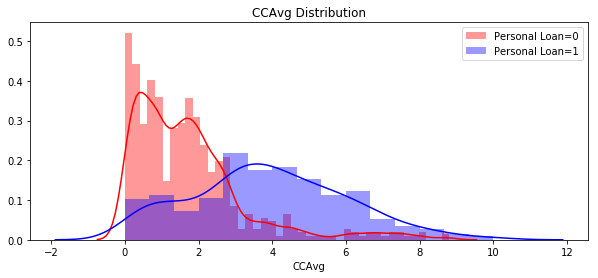

In [42]:
plt.figure(figsize=(10,4))
sns.distplot(df[df["Personal Loan"] == 0]['CCAvg'], color = 'r',label='Personal Loan=0')
sns.distplot(df[df["Personal Loan"] == 1]['CCAvg'], color = 'b',label='Personal Loan=1')
plt.legend()
plt.title("CCAvg Distribution")

<b>Observation: </b> Customers who have taken personal loan have higher credit card average than those who did not take loan. So high credit card average seems to be good predictor of whether or not a customer will take a personal loan.

In [43]:
print('Credit card spending of Non-Loan customers: ',df[df['Personal Loan'] == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', df[df['Personal Loan'] == 1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


<b>Comment:</b> The graph show persons who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a loan.

Text(0.5, 1.0, 'Income Distribution')

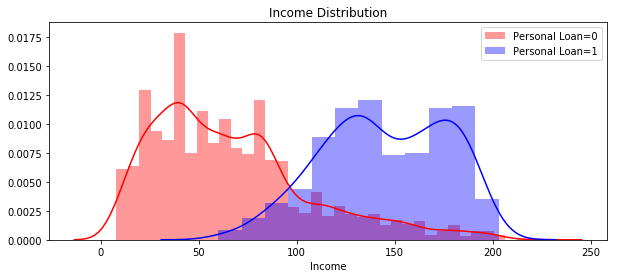

In [44]:
plt.figure(figsize=(10,4))
sns.distplot(df[df["Personal Loan"] == 0]['Income'], color = 'r',label='Personal Loan=0')
sns.distplot(df[df["Personal Loan"] == 1]['Income'], color = 'b',label='Personal Loan=1')
plt.legend()
plt.title("Income Distribution")

<b>Observation: </b> Customers who have taken personal loan have income than those who did not take. So high income seems to be good predictor of whether or not a customer will take a personal loan.

### Outliers Detection :-

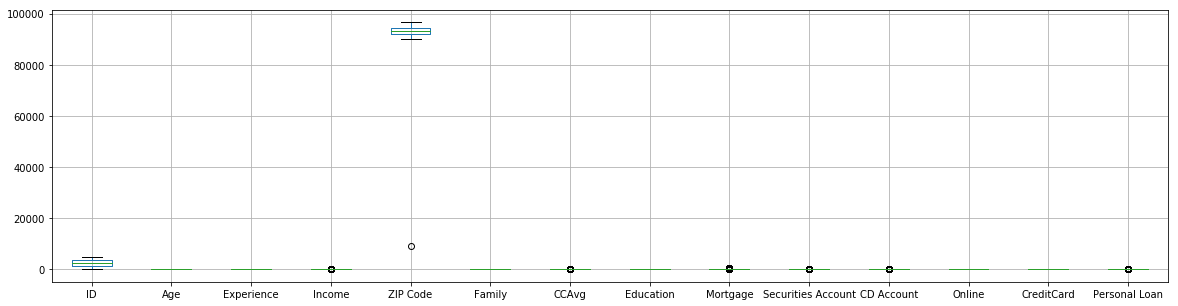

In [45]:
df.boxplot(return_type='axes', figsize=(20,5))

<b>Comment:</b> From the above boxplot we can see there are outliers on few colomns. Mortgage has more number of outlier. Income, CCAvg have also outliers. We will try to fix the outlier by scaling the attributes.

### Correlation using Heatmap :-

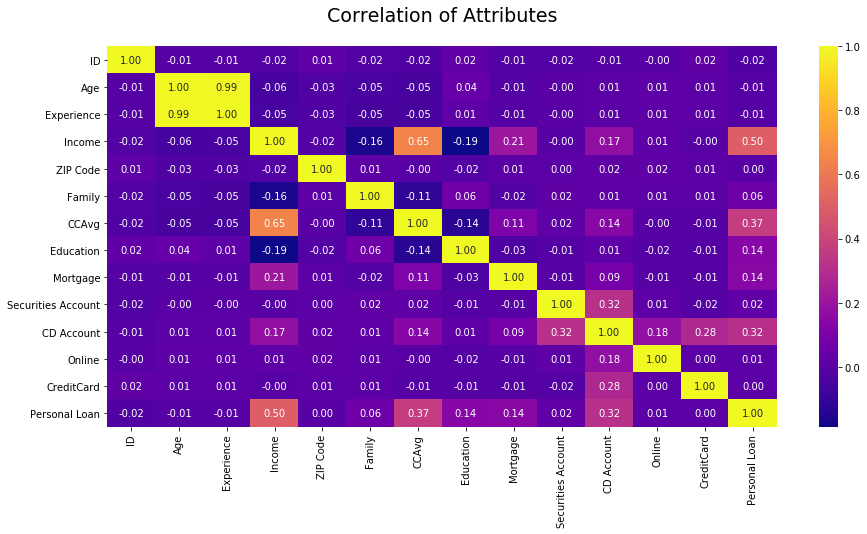

In [46]:
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(df.corr(), cmap='plasma',annot=True, fmt='.2f')

<b>Observation:</b> From the above heatmap we can see that :
- Age and Experience are highly correlated and the correlation is almost 1.
- 'Income' and 'CCAvg' is moderately correlated.
- Personal Loan has maximum correlation with 'Income', 'CCAvg', 'CD Account', 'Mortgage', and 'Education'.
- We can see in above heat map there is association of 'CD Account' with 'Credit Card', 'Securities Account', 'Online', 'CCAvg' and 'Income'.
- 'Mortgage' has moderate correlation with 'Income' which is about 12%.
- 'Income' influences 'CCAvg', 'Personal Loan', 'CD Account' and 'Mortgage'.


# ::------------------------- Model Building ---------------------------------::

## Dimensionality Reduction : -
- As we have seen above 'ID' and 'ZIP Code' are not relevent for our model building so we will drop it.
- 'Age' and 'Experience' are highly correlated so we will build our model <b>with 'Experience'</b> and <b>without 'Experience'</b> after that we will compare the accurace which will lead us to the conclution that with 'Experience' or without 'Experience' which model is better for prediction. 

#### Dropping 'ID' and 'ZIP Code' :

In [47]:
df.head(1)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0


In [48]:
df = df.drop(['ID','ZIP Code'], axis=1)

In [49]:
df.head(1)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49,4,1.6,1,0,1,0,0,0,0


### Creating two dataframes with 'Experience' and without 'Experience' repectively :

In [50]:
loan_with_experience = df
loan_without_experience = df.drop(['Experience'], axis=1)

In [51]:
print('Columns With Experience : ', loan_with_experience.columns)
print('Columns Without Experience : ', loan_without_experience.columns)

Columns With Experience :  Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'Personal Loan'],
      dtype='object')
Columns Without Experience :  Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'Personal Loan'],
      dtype='object')


#### Seperating Target Variable from Independent Variables from Expr and Wihtout Expr dataframe :


In [52]:
# From Exprenece Dataframe:
X_Expr = loan_with_experience.drop('Personal Loan', axis=1)
Y_Expr = loan_with_experience[['Personal Loan']]

In [53]:
# From Exprenece Dataframe:
X_Without_Expr = loan_without_experience.drop('Personal Loan', axis=1)
Y_Without_Expr = loan_without_experience[['Personal Loan']]

## Spliting the data into training and test set in the ratio of 70:30 respectively :-

In [54]:
# From Experience Dataframe:
X_Expr_train, X_Expr_test, y_Expr_train, y_Expr_test = train_test_split(X_Expr, Y_Expr, test_size=0.30, random_state=1)
print('x train data {}'.format(X_Expr_train.shape))
print('y train data {}'.format(y_Expr_train.shape))
print('x test data  {}'.format(X_Expr_test.shape))
print('y test data  {}'.format(y_Expr_test.shape))

x train data (3500, 11)
y train data (3500, 1)
x test data  (1500, 11)
y test data  (1500, 1)


In [55]:
# From Without Experience Dataframe:
X_train, X_test, y_train, y_test = train_test_split(X_Without_Expr, Y_Without_Expr, test_size=0.30, random_state=1)
print('x train data {}'.format(X_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

x train data (3500, 10)
y train data (3500, 1)
x test data  (1500, 10)
y test data  (1500, 1)


## ::---------------------------- Logistic Regression ---------------------------------------::

### With Experience Column:-

In [56]:
#X_Exp_train, X_Exp_test, y_Exp_train, y_Exp_test
logreg_expr_model = LogisticRegression()
logreg_expr_model.fit(X_Expr_train, y_Expr_train)
print(logreg_expr_model , '\n')

# Predicting for test set
logreg_expr_y_predicted = logreg_expr_model.predict(X_Expr_test)
logreg_expr_score = logreg_expr_model.score(X_Expr_test, y_Expr_test)
logreg_expr_accuracy = accuracy_score(y_Expr_test, logreg_expr_y_predicted)

logestic_confusion_matrix_expr = metrics.confusion_matrix(y_Expr_test, logreg_expr_y_predicted)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 



/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Without Experience Column:-

In [57]:
#X_train, X_test, y_train, y_test
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Predicting for test set
logreg_y_predicted = logreg_model.predict(X_test)
logreg_score = logreg_model.score(X_test, y_test)
logreg_accuracy = accuracy_score(y_test, logreg_y_predicted)
logestic_confusion_matrix = metrics.confusion_matrix(y_test, logreg_y_predicted)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<b>Comparison :</b> Below is the comparison b/w Logistic Regression Model Accuracy and Confussion Matrix with 'Experience' and W/O 'Experience'.

In [58]:
# Accuracy
print('Logistic Regression Model Accuracy Score W/O Experience  : %f'  % logreg_accuracy)
print('Logistic Regression Model Accuracy Score With Experience : %f'  % logreg_expr_accuracy)

# Confusion Matrix
print('\nLogistic Regression Confusion Matrix W/O Experience: \n', logestic_confusion_matrix)
print('\nTrue Possitive    = ', logestic_confusion_matrix[1][1])
print('True Negative     = ',   logestic_confusion_matrix[0][0])
print('False Possive     = ',   logestic_confusion_matrix[0][1])
print('False Negative    = ',   logestic_confusion_matrix[1][0])
print('\nLogistic Regression Confusion Matrix With Experience: \n', logestic_confusion_matrix_expr)
print('\nTrue Possitive    = ', logestic_confusion_matrix_expr[1][1])
print('True Negative     = ',   logestic_confusion_matrix_expr[0][0])
print('False Possive     = ',   logestic_confusion_matrix_expr[0][1])
print('False Negative    = ',   logestic_confusion_matrix_expr[1][0])


Logistic Regression Model Accuracy Score W/O Experience  : 0.940000
Logistic Regression Model Accuracy Score With Experience : 0.944000

Logistic Regression Confusion Matrix W/O Experience: 
 [[1339   12]
 [  78   71]]

True Possitive    =  71
True Negative     =  1339
False Possive     =  12
False Negative    =  78

Logistic Regression Confusion Matrix With Experience: 
 [[1334   17]
 [  67   82]]

True Possitive    =  82
True Negative     =  1334
False Possive     =  17
False Negative    =  67


<b>Observation: </b> 
- From the above accuracy results we see that accuracy is higher with 'Experience' (94.60 %) than without 'Experience' (94.26%). 
- Also from the above confusion metrices we can see that the prediction of customers who dont accept loan and the customers who accept loan is better with 'Experience'.
- <b>Type 1 (False Possitive)</b> and <b>Type 2(False Negative)</b> errors is less with experience.
- Hence we can imporove the accuracy by scalling the attributes.
- We will not consider dafaframe without 'Experience' for further iteration.

### Improvement of  the model -------- Iteration 2 For Logistic Regression with Experience--------

In [59]:
#X_Expr_train, X_Expr_test, y_Expr_train, y_Expr_test
X_train_scaled = preprocessing.scale(X_Expr_train)
X_test_scaled = preprocessing.scale(X_Expr_test)

In [60]:
scaled_logreg_model = LogisticRegression()
scaled_logreg_model.fit(X_train_scaled, y_Expr_train)

# Predicting for test set
scaled_logreg_y_predicted = scaled_logreg_model.predict(X_test_scaled)
scaled_logreg_model_score = scaled_logreg_model.score(X_test_scaled, y_Expr_test)
scaled_logreg_accuracy = accuracy_score(y_Expr_test, scaled_logreg_y_predicted)

scaled_logreg_confusion_matrix = metrics.confusion_matrix(y_Expr_test, scaled_logreg_y_predicted)


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:

print('----------------------Final Analysis of Logistic Regression----------------------------\n')
print('After Scalling Logistic Regression Model Accuracy Score with Experience: %f'  % scaled_logreg_accuracy)
print('\nAfter Scalling Logistic Regression Confusion Matrix With Experience: \n', scaled_logreg_confusion_matrix)
print('\nTrue Possitive    = ', scaled_logreg_confusion_matrix[1][1])
print('True Negative     = ',   scaled_logreg_confusion_matrix[0][0])
print('False Possive     = ',   scaled_logreg_confusion_matrix[0][1])
print('False Negative    = ',   scaled_logreg_confusion_matrix[1][0])
print('\nK-NN classification Report : \n',metrics.classification_report(y_Expr_test, scaled_logreg_y_predicted))
conf_table = scaled_logreg_confusion_matrix
a = (conf_table[0,0] + conf_table[1,1]) / (conf_table[0,0] + conf_table[0,1] + conf_table[1,0] + conf_table[1,1])
p = conf_table[1,1] / (conf_table[1,1] + conf_table[0,1])
r = conf_table[1,1] / (conf_table[1,1] + conf_table[1,0])
f = (2 * p * r) / (p + r)
print("Accuracy of accepting Loan  : ",round(a,2))
print("precision of accepting Loan : ",round(p,2))
print("recall of accepting Loan    : ",round(r,2))
print("F1 score of accepting Loan  : ",round(f,2))

----------------------Final Analysis of Logistic Regression----------------------------

After Scalling Logistic Regression Model Accuracy Score with Experience: 0.947333

After Scalling Logistic Regression Confusion Matrix With Experience: 
 [[1333   18]
 [  61   88]]

True Possitive    =  88
True Negative     =  1333
False Possive     =  18
False Negative    =  61

K-NN classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.83      0.59      0.69       149

    accuracy                           0.95      1500
   macro avg       0.89      0.79      0.83      1500
weighted avg       0.94      0.95      0.94      1500

Accuracy of accepting Loan  :  0.95
precision of accepting Loan :  0.83
recall of accepting Loan    :  0.59
F1 score of accepting Loan  :  0.69


## ::------------------------------ K-NN --------------------------------------------::

### Steps to be followed:-
- We will follow the same procedures as we have followed in Logistic Regression.
- We will try the model with 'Experience' and without 'Experience'.
- will run the KNN with number of odd neighbours ranges from 1 to 20 and will find the optimal number of neighbours using the Mis classification error.
- After finding <b>best K</b>, will build the model using 'Experience' and without 'Experience'. 

#### Below Code is to find the best K(Neighbors)


Odd Neighbors : 
 [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

Accuracy Score : 
 [0.9086666666666666, 0.9093333333333333, 0.906, 0.9026666666666666, 0.9053333333333333, 0.908, 0.908, 0.9066666666666666, 0.9073333333333333, 0.904]

Misclassification error :
 [0.09133333333333338, 0.09066666666666667, 0.09399999999999997, 0.09733333333333338, 0.09466666666666668, 0.09199999999999997, 0.09199999999999997, 0.09333333333333338, 0.09266666666666667, 0.09599999999999997]

The optimal number of neighbor is k= 3


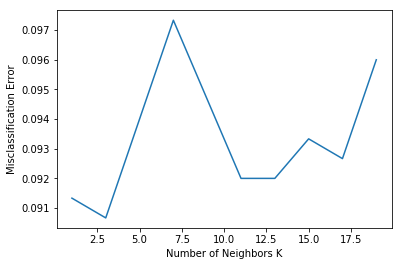

In [62]:
#Creating number list from range 1 to 20 of K for KNN

numberList = list(range(1,20))
neighbors = list(filter(lambda x: x % 2 != 0 , numberList)) #subsetting just the odd ones

#Declearing a empty list that will hold the accuracy scores
ac_scores = []
#performing accuracy metrics for value from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    #predict the response
    knn.fit(X_train, y_train.values.ravel())               
    y_pred = knn.predict(X_test)
    #evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    #insert scores to the list
    ac_scores.append(scores)                

MSE = [1 - x for x in ac_scores] # changing to misclassification error


# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]

print('Odd Neighbors : \n', neighbors)
print('\nAccuracy Score : \n', ac_scores)
print('\nMisclassification error :\n', MSE)
print("\nThe optimal number of neighbor is k=",optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

<b>Decission: </b> 
- From above result we can see that the misclassification error is minimum at <b>k = 3</b>. 
- Hence I am considering 3 is the optimal k. When k=3 the model accuracy is 0.909.
- From above graph of misclassification error vs k (with k value on X-axis) we can also see that error is very low when K is 3.

### Model building using  'Without Experience' dataframe:-
- We have already created the dataframe and splited the data logistic regression, will be using the same.
- Splited data from 'Without Experience' dataframe: X_train, X_test, y_train, y_test

In [63]:
# instantiating learning model (optimal_k = 3)
knn_model = KNeighborsClassifier(n_neighbors=optimal_k , weights = 'uniform', metric='euclidean')
knn_model.fit(X_train, y_train)
knn_y_predicted = knn_model.predict(X_test)
knn_score = knn_model.score(X_test, y_test)
knn_accuracy = accuracy_score(y_test, knn_y_predicted)
knn_confusion_matrix = metrics.confusion_matrix(y_test, knn_y_predicted)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


### Model building using  'With Experience' dataframe:-
- We have already created the dataframe and splited the data logistic regression, will be using the same.
- Splited data from 'With Experience' dataframe: X_Expr_train, X_Expr_test, y_Expr_train, y_Expr_test

In [64]:
# instantiating learning model (optimal_k = 3)
knn_model_expr = KNeighborsClassifier(n_neighbors=optimal_k , weights = 'uniform', metric='euclidean')
knn_model_expr.fit(X_Expr_train, y_Expr_train)
knn_expr_y_predicted = knn_model_expr.predict(X_Expr_test)
knn_expr_score = knn_model_expr.score(X_Expr_test, y_Expr_test)
knn_expr_accuracy = accuracy_score(y_Expr_test, knn_expr_y_predicted)
knn_confusion_matrix_expr = metrics.confusion_matrix(y_Expr_test, knn_expr_y_predicted)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


<b>Comparison :</b> Below is the comparison b/w K-NN Model Accuracy and Confussion Matrix with 'Experience' and W/O 'Experience'.

In [65]:
# Comparison 
print('K-NN Model Accuracy Score W/O Experience  : %f'  % knn_accuracy)
print('K-NN Model Accuracy Score With Experience : %f'  % knn_expr_accuracy)

# Confusion Matrix
print('\nK-NN Confusion Matrix W/O Experience: \n', knn_confusion_matrix)
print('\nTrue Possitive    = ', knn_confusion_matrix[1][1])
print('True Negative     = ',   knn_confusion_matrix[0][0])
print('False Possive     = ',   knn_confusion_matrix[0][1])
print('False Negative    = ',   knn_confusion_matrix[1][0])
print('\nK-NN Confusion Matrix With Experience: \n', knn_confusion_matrix_expr)
print('\nTrue Possitive    = ', knn_confusion_matrix_expr[1][1])
print('True Negative     = ',   knn_confusion_matrix_expr[0][0])
print('False Possive     = ',   knn_confusion_matrix_expr[0][1])
print('False Negative    = ',   knn_confusion_matrix_expr[1][0])


K-NN Model Accuracy Score W/O Experience  : 0.909333
K-NN Model Accuracy Score With Experience : 0.904000

K-NN Confusion Matrix W/O Experience: 
 [[1304   47]
 [  89   60]]

True Possitive    =  60
True Negative     =  1304
False Possive     =  47
False Negative    =  89

K-NN Confusion Matrix With Experience: 
 [[1301   50]
 [  94   55]]

True Possitive    =  55
True Negative     =  1301
False Possive     =  50
False Negative    =  94


<b>Observation: </b> 
- From the above accuracy results we see that accuracy is higher at without 'Experience' (90.93%) than with 'Experience' (90.20%). 
- Also from the above confusion metrices we can see that the prediction of customers who dont accept loan and the customers who accept loan is better at without 'Experience'.
- <b>Type 1 (False Possitive)</b> and <b>Type 2(False Negative)</b> errors is less at without Experience.
- Hence we can imporove the accuracy by scalling the attributes.
- We will not consider dafaframe 'With Experience' for further iteration.

### Improvement of  the model -------- Iteration 2 For K-NN without Experience dataset--------

In [66]:
#X_train, X_test, y_train, y_test
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [67]:
scaled_knn_model = KNeighborsClassifier(n_neighbors=optimal_k , weights = 'uniform', metric='euclidean')
scaled_knn_model.fit(X_train_scaled, y_train)
scaled_knn_y_predict = scaled_knn_model.predict(X_test_scaled)
scaled_knn_score = scaled_knn_model.score(X_test_scaled, y_test)
scaled_knn_accuracy = accuracy_score(y_test, scaled_knn_y_predict)
scaled_knn_confusion_matrix = metrics.confusion_matrix(y_test, scaled_knn_y_predict)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [68]:

print('----------------------Final Analysis of K-NN----------------------------\n')
print('After Scalling K-NN Model Accuracy Score without Experience: %f'  % scaled_knn_accuracy)
print('\nAfter Scalling K-NN Confusion Matrix Without Experience: \n', scaled_knn_confusion_matrix)
print('\nTrue Possitive    = ', scaled_knn_confusion_matrix[1][1])
print('True Negative     = ',   scaled_knn_confusion_matrix[0][0])
print('False Possive     = ',   scaled_knn_confusion_matrix[0][1])
print('False Negative    = ',   scaled_knn_confusion_matrix[1][0])
print('\nK-NN classification Report : \n',metrics.classification_report(y_test, scaled_knn_y_predict))
knn_conf_table = scaled_knn_confusion_matrix
a = (knn_conf_table[0,0] + knn_conf_table[1,1]) / (knn_conf_table[0,0] + knn_conf_table[0,1] + knn_conf_table[1,0] + knn_conf_table[1,1])
p = knn_conf_table[1,1] / (knn_conf_table[1,1] + knn_conf_table[0,1])
r = knn_conf_table[1,1] / (knn_conf_table[1,1] + knn_conf_table[1,0])
f = (2 * p * r) / (p + r)
print("\nAccuracy of accepting Loan  : ",round(a,2))
print("precision of accepting Loan : ",round(p,2))
print("recall of accepting Loan    : ",round(r,2))
print("F1 score of accepting Loan  : ",round(f,2))

----------------------Final Analysis of K-NN----------------------------

After Scalling K-NN Model Accuracy Score without Experience: 0.958667

After Scalling K-NN Confusion Matrix Without Experience: 
 [[1341   10]
 [  52   97]]

True Possitive    =  97
True Negative     =  1341
False Possive     =  10
False Negative    =  52

K-NN classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1351
           1       0.91      0.65      0.76       149

    accuracy                           0.96      1500
   macro avg       0.93      0.82      0.87      1500
weighted avg       0.96      0.96      0.96      1500


Accuracy of accepting Loan  :  0.96
precision of accepting Loan :  0.91
recall of accepting Loan    :  0.65
F1 score of accepting Loan  :  0.76


## ::-------------------------- Naïve Bayes -------------------------------------::


### Steps to be followed:-
- We will follow the same procedures as we have done in above models.
- We will try the model with 'Experience' and without 'Experience'.

### Model building using  'Without Experience' dataframe:-
- Splited data from 'Without Experience' dataframe: X_train, X_test, y_train, y_test

In [69]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_y_predicted = gnb_model.predict(X_test)
gnb_score = gnb_model.score(X_test, y_test)
gnb_accuracy = accuracy_score(y_test, gnb_y_predicted)
gnb_confusion_matrix = metrics.confusion_matrix(y_test, gnb_y_predicted)

/opt/conda/lib/python3.6/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Model building using  'With Experience' dataframe:-
- Splited data from 'With Experience' dataframe: X_Expr_train, X_Expr_test, y_Expr_train, y_Expr_test

In [70]:
gnb_expr_model = GaussianNB()
gnb_expr_model.fit(X_Expr_train, y_Expr_train)
gnb_expr_y_predicted = gnb_expr_model.predict(X_Expr_test)
gnb_expr_score = gnb_expr_model.score(X_Expr_test, y_Expr_test)
gnb_expr_accuracy = accuracy_score(y_Expr_test, gnb_expr_y_predicted)
gnb_expr_confusion_matrix = metrics.confusion_matrix(y_Expr_test, gnb_expr_y_predicted)

/opt/conda/lib/python3.6/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [71]:
# Comparison 
print('Naïve Bayes Model Accuracy Score W/O Experience  : %f'  % gnb_accuracy)
print('Naïve Bayes Model Accuracy Score With Experience : %f'  % gnb_expr_accuracy)

# Confusion Matrix
print('\nNaïve Bayes Confusion Matrix W/O Experience: \n', gnb_confusion_matrix)
print('\nTrue Possitive    = ', gnb_confusion_matrix[1][1])
print('True Negative     = ',   gnb_confusion_matrix[0][0])
print('False Possive     = ',   gnb_confusion_matrix[0][1])
print('False Negative    = ',   gnb_confusion_matrix[1][0])
print('\nNaïve Bayes Confusion Matrix With Experience: \n', gnb_expr_confusion_matrix)
print('\nTrue Possitive    = ', gnb_expr_confusion_matrix[1][1])
print('True Negative     = ',   gnb_expr_confusion_matrix[0][0])
print('False Possive     = ',   gnb_expr_confusion_matrix[0][1])
print('False Negative    = ',   gnb_expr_confusion_matrix[1][0])



Naïve Bayes Model Accuracy Score W/O Experience  : 0.874667
Naïve Bayes Model Accuracy Score With Experience : 0.874667

Naïve Bayes Confusion Matrix W/O Experience: 
 [[1227  124]
 [  64   85]]

True Possitive    =  85
True Negative     =  1227
False Possive     =  124
False Negative    =  64

Naïve Bayes Confusion Matrix With Experience: 
 [[1228  123]
 [  65   84]]

True Possitive    =  84
True Negative     =  1228
False Possive     =  123
False Negative    =  65


<b>Observation: </b> 
- From the above accuracy results we see that accuracy is alomost at without 'Experience' and with 'Experience'. 
- Also from the above confusion metrices we can see that the prediction of customers who dont accept loan and the customers who accept loan is almost same at without 'Experience'.
- <b>Type I (False Possitive)</b> and <b>Type II(False Negative)</b> errors is same.
- Hence we can imporove the accuracy by scalling the attributes.
- We can consider any dafaframe 'With Experience' or 'Without Experience' for further iteration.

### Improvement of  the model -------- Iteration 2 For Naïve Bayes without Experience dataset--------
- We have already scaled the attribute in K-NN model building, will be using the same
- X_train_scaled and X_test_scaled

In [72]:
scaled_gnb_model = GaussianNB()
scaled_gnb_model.fit(X_train_scaled, y_train)
scaled_gnb_y_predict = scaled_gnb_model.predict(X_test_scaled)
scaled_gnb_score = scaled_gnb_model.score(X_test_scaled, y_test)
scaled_gnb_accuracy = accuracy_score(y_test, scaled_gnb_y_predict)
scaled_gnb_connfusion_matrix = metrics.confusion_matrix(y_test, scaled_gnb_y_predict)

/opt/conda/lib/python3.6/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [73]:

print('----------------------Final Analysis of Naïve Bayes----------------------------\n')
print('After Scalling Naïve Bayes Model Accuracy Score: %f'  % scaled_gnb_accuracy)
print('\nAfter Scalling Naïve Bayes Confusion Matrix: \n', scaled_gnb_connfusion_matrix)
print('\nTrue Possitive    = ', scaled_gnb_connfusion_matrix[1][1])
print('True Negative     = ',   scaled_gnb_connfusion_matrix[0][0])
print('False Possive     = ',   scaled_gnb_connfusion_matrix[0][1])
print('False Negative    = ',   scaled_gnb_connfusion_matrix[1][0])
print('\n Gaussian Naive Bayes classification Report : \n',metrics.classification_report(y_test, gnb_y_predicted))
gnb_conf_table = scaled_gnb_connfusion_matrix
a = (gnb_conf_table[0,0] + gnb_conf_table[1,1]) / (gnb_conf_table[0,0] + gnb_conf_table[0,1] + gnb_conf_table[1,0] + knn_conf_table[1,1])
p = gnb_conf_table[1,1] / (gnb_conf_table[1,1] + gnb_conf_table[0,1])
r = gnb_conf_table[1,1] / (gnb_conf_table[1,1] + gnb_conf_table[1,0])
f = (2 * p * r) / (p + r)
print("\nAccuracy of accepting Loan   : ",round(a,2))
print("precision of accepting Loan  : ",round(p,2))
print("recall of accepting Loan     : ",round(r,2))
print("F1 score of accepting Loan   : ",round(f,2))

----------------------Final Analysis of Naïve Bayes----------------------------

After Scalling Naïve Bayes Model Accuracy Score: 0.872000

After Scalling Naïve Bayes Confusion Matrix: 
 [[1224  127]
 [  65   84]]

True Possitive    =  84
True Negative     =  1224
False Possive     =  127
False Negative    =  65

 Gaussian Naive Bayes classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.41      0.57      0.47       149

    accuracy                           0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500


Accuracy of accepting Loan   :  0.86
precision of accepting Loan  :  0.4
recall of accepting Loan     :  0.56
F1 score of accepting Loan   :  0.47


# =========== COMPARISON OF ABOVE THREE MODELS ==========

Overall Model Accuracy After scaling:

Logistic Regression : 95%
K-Nearest Neighbors : 96%
Naive Bayes         : 87%

Overall Model Confusion matrix After scaling:


Logistic Regression: 
 [[1333   18]
 [  61   88]]

     True Possitive    =  88
     True Negative     =  1333
     False Possive     =  18
     False Negative    =  61

K-Nearest Neighbors: 
 [[1341   10]
 [  52   97]]

    True Possitive    =  97
    True Negative     =  1341
    False Possive     =  10
    False Negative    =  52

Naive Bayes: 
 [[1224  127]
 [  65   84]]

    True Possitive    =  84
    True Negative     =  1224
    False Possive     =  127
    False Negative    =  65


Receiver Operating Characteristic (ROC) curve to evalute the classifier output quality.  If area of curve is closer to 1 which means better the model and if area of curve is closer to 0 which means poor the model.


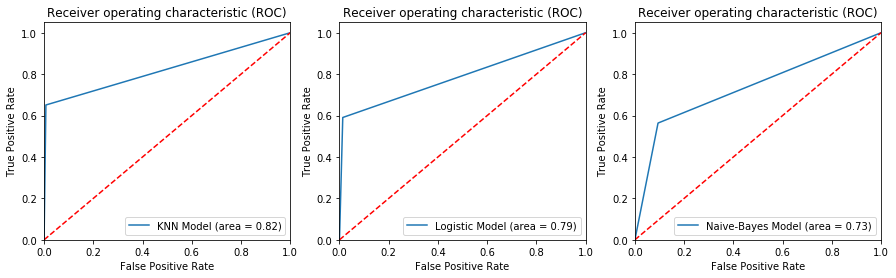

In [74]:
print('Overall Model Accuracy After scaling:\n')
print ('Logistic Regression : {0:.0f}%'. format(scaled_logreg_accuracy * 100))
print ('K-Nearest Neighbors : {0:.0f}%'. format(scaled_knn_accuracy * 100))
print ('Naive Bayes         : {0:.0f}%'. format(scaled_gnb_accuracy * 100))

print('\nOverall Model Confusion matrix After scaling:\n')
print('\nLogistic Regression: \n', scaled_logreg_confusion_matrix)
print('\n     True Possitive    = ', scaled_logreg_confusion_matrix[1][1])
print('     True Negative     = ',   scaled_logreg_confusion_matrix[0][0])
print('     False Possive     = ',   scaled_logreg_confusion_matrix[0][1])
print('     False Negative    = ',   scaled_logreg_confusion_matrix[1][0])

print('\nK-Nearest Neighbors: \n', scaled_knn_confusion_matrix)
print('\n    True Possitive    = ', scaled_knn_confusion_matrix[1][1])
print('    True Negative     = ',   scaled_knn_confusion_matrix[0][0])
print('    False Possive     = ',   scaled_knn_confusion_matrix[0][1])
print('    False Negative    = ',   scaled_knn_confusion_matrix[1][0])

print('\nNaive Bayes: \n', scaled_gnb_connfusion_matrix)
print('\n    True Possitive    = ', scaled_gnb_connfusion_matrix[1][1])
print('    True Negative     = ',   scaled_gnb_connfusion_matrix[0][0])
print('    False Possive     = ',   scaled_gnb_connfusion_matrix[0][1])
print('    False Negative    = ',   scaled_gnb_connfusion_matrix[1][0])


print('\n\nReceiver Operating Characteristic (ROC) curve to evalute the classifier output quality.  If area of curve is closer to 1 which means better the model and if area of curve is closer to 0 which means poor the model.')

knn_fpr, knn_tpr, knn_threshold = metrics.roc_curve(y_test, scaled_knn_y_predict)
knn_roc_auc = metrics.roc_auc_score(y_test, scaled_knn_y_predict)
fig1_graph = plt.figure(figsize=(15,4))
fig1_graph.add_subplot(1,3,1)
plt.plot(knn_fpr, knn_tpr, label='KNN Model (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")


logistic_fpr, logistic_tpr, logistic_threshold = metrics.roc_curve(y_Expr_test, scaled_logreg_y_predicted)
logistic_roc_auc = metrics.roc_auc_score(y_Expr_test, scaled_logreg_y_predicted)
fig1_graph.add_subplot(1,3,2)
plt.plot(logistic_fpr, logistic_tpr, label='Logistic Model (area = %0.2f)' % logistic_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

nb_fpr, nb_tpr, nb_threshold = metrics.roc_curve(y_test, scaled_gnb_y_predict)
nb_roc_auc = metrics.roc_auc_score(y_test, scaled_gnb_y_predict)
fig1_graph.add_subplot(1,3,3)
plt.plot(nb_fpr, nb_tpr, label='Naive-Bayes Model (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


### Final Conclusion to Predict the best Model ::-

- From the above, we can clearly see that k-Nearest Neighbors Alogorithm with scaled data gives us best accuracy of 96%. 
- Also the <b>Type I(False Posssitive)</b> and <b>Type II(False Negative)</b> errors are least in K-Nearest model. 
- The area in ROC curve for K-NN is 0.82 which is close to 1 which stats that K-NN is the best model in comparesion of Logistic Model and Naive-Bayes Model whose ROC area is 0.79 and 0.73 repectively.
- Hence among the above three algorithm applied on the underline dataset, K-NN would be the best choice to predict the customers who will accept the personal loan.

## ---------------------------------------END----------------------------------------------